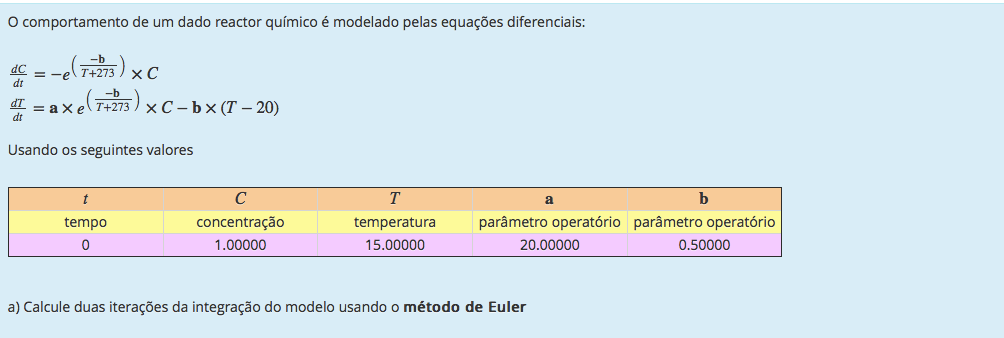

In [1]:
from math import exp

def dc(T,C):
    return -exp(-0.5/(T+273.0))*C

def dt(T,C):
    return 20.0*exp(-0.5/(T+273.0))*C-0.5*(T-20.0)

def euler(deltat,t,C,T,x=[0,0,0],N=3,info=True):
    for i in range(N-1):
        if info:
            print("\nIteration:",i)
            print("t:",t)
            print("C:",C)
            print("T:",T)
        
        deltaC = deltat*dc(T,C)
        deltaT = deltat*dt(T,C)
        C += deltaC
        T += deltaT
        t += deltat
    
    if info:
        print("\nIteration:",N-1)
        print("t:",t)
        print("C:",C)
        print("T:",T)
    
    return C
        
euler(0.25,0,1,15)

In [2]:
def rk4(deltat,t,C,T,x=[0,0,0],N=3,info=True):
    for i in range(N-1):
        if info:
            print("\nIteration:",i)
            print("t:",t)
            print("C:",C)
            print("T:",T)
        
        dC1 = deltat*dc(T,C)
        dT1 = deltat*dt(T,C)
        dC2 = deltat*dc(T+dT1/2,C+dC1/2)
        dT2 = deltat*dt(T+dT1/2,C+dC1/2)
        dC3 = deltat*dc(T+dT2/2,C+dC2/2)
        dT3 = deltat*dt(T+dT2/2,C+dC2/2)
        dC4 = deltat*dc(T+dT3,C+dC3)
        dT4 = deltat*dt(T+dT3,C+dC3)
        
        C += dC1/6+dC2/3+dC3/3+dC4/6
        T += dT1/6+dT2/3+dT3/3+dT4/6
        t += deltat
    
    if info:
        print("\nIteration:",N-1)
        print("t:",t)
        print("C:",C)
        print("T:",T)
        
    return C
rk4(0.25,0,1,15)


Iteration: 0
t: 0
C: 1
T: 15

Iteration: 1
t: 0.25
C: 0.7791434232697225
T: 19.72879863710097

Iteration: 2
t: 0.5
C: 0.6070609666643584
T: 22.987385312700958


0.6070609666643584

In [3]:
N = 3
deltat = 0.25


s=euler(deltat,0,1,15,N=N,info=False)
s1=euler(deltat/2,0,1,15,N=N*2,info=False)
s2=euler(deltat/4,0,1,15,N=N*4,info=False) 
        

In [4]:
print("S:",s)
print("S':",s1)
print("S'':",s2)

print("QC:",(s1-s)/(s2-s1))
print("error:",abs(s2-s1))


S: 0.5631444454100145
S': 0.5135345873076521
S'': 0.4922959811789155
QC: 2.3358339903125005
error: 0.021238606128736626


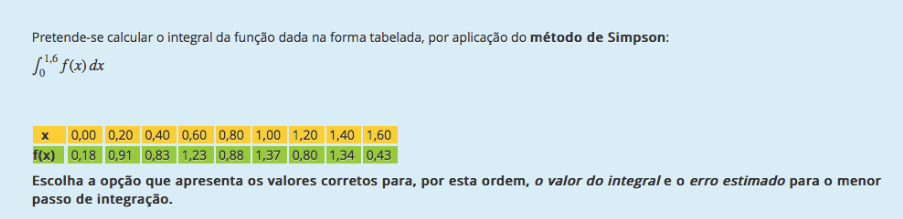

In [5]:
func = {0:0.18,
       0.20:0.91,
       0.40:0.83,
       0.60:1.23,
       0.80:0.88,
       1.00:1.37,
       1.20:0.80,
       1.40:1.34,
       1.60:0.43}

def simpson(h,x0,x1,f):
    i = 1
    res = 0
    x = x0 + h
    while x<x1:
        if i % 2 == 0:
            res += 2*f[round(x,6)]
        else:
            res += 4*f[round(x,6)]
        i += 1
        x = i*h
        
    return h*(f[x0]+f[x1]+res)/3

s = simpson(0.8,0,1.6,func)
s1 = simpson(0.4,0,1.6,func)
s2 = simpson(0.2,0,1.6,func)
print("h=0.8:",s)
print("h=0.4:",s1)
print("h=0.2:",s2)

print("erro:",(s2-s1)/15)

h=0.8: 1.1013333333333335
h=0.4: 1.1853333333333336
h=0.2: 1.6686666666666667
erro: 0.032222222222222215


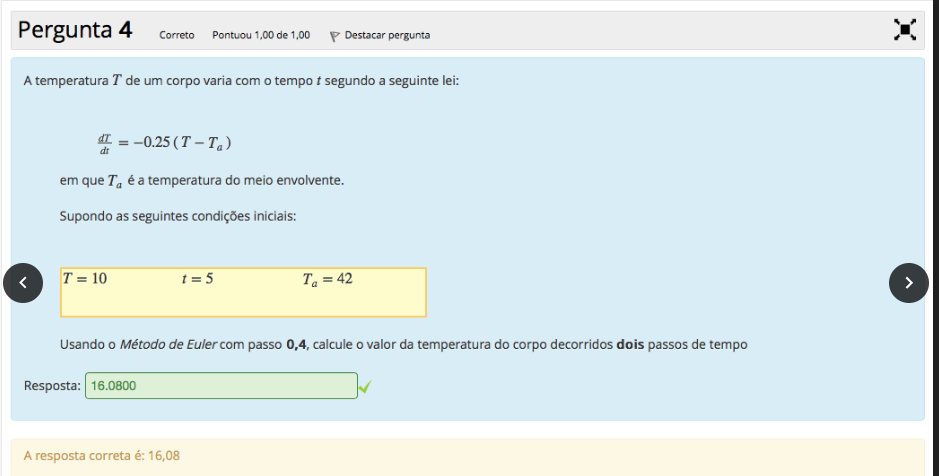

In [6]:
def dT(T):
    return -0.25*(T-42)

def euler4(deltat,t,T,N=3):
    for i in range(N-1):
        print("\niteration",i)
        print("t:",t)
        print("T:",T)
        
        T += deltat*dT(T)
        t += deltat
        
    print("\niteration",N-1)
    print("t:",t)
    print("->T:",T)

euler4(0.4,5,10)


iteration 0
t: 5
T: 10

iteration 1
t: 5.4
T: 13.2

iteration 2
t: 5.800000000000001
->T: 16.08


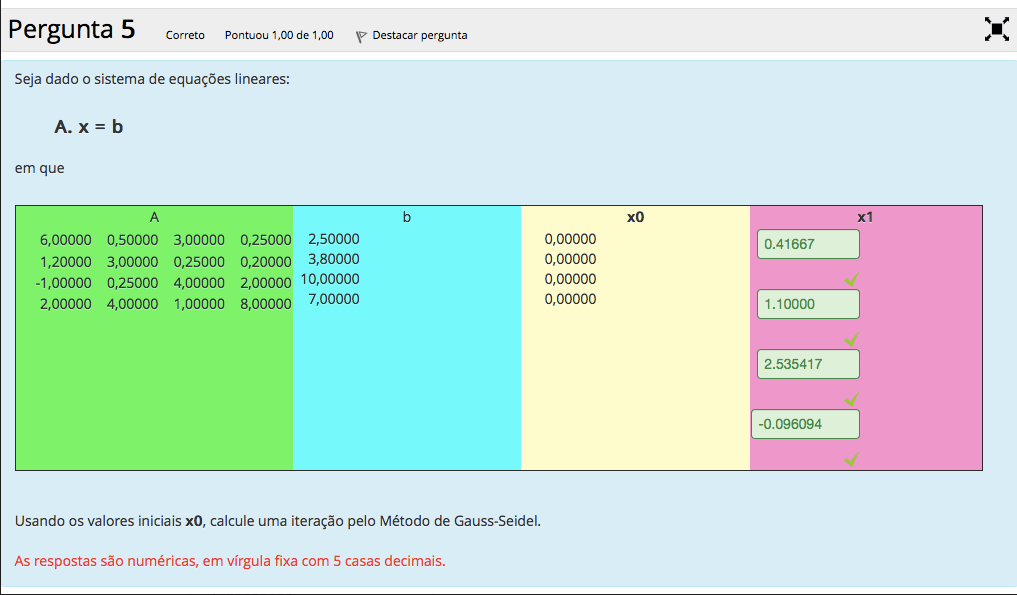

In [7]:
def gaussSeidel(A,b,x=None,N=10,info=True):
    if x is None:
        x = [0 for i in A[0]]

    for i in range(N):
        for j in range(len(A[0])):
            x1 = (b[j] - (A[j][0] * x[0] + A[j][1] * x[1] + A[j][2] * x[2])) / A[j][j]
            x[j] += x1

    return x

matA = [[6,0.5,3,0.25],[1.2,3,0.25,0.2],[-1,0.25,4,2],[2,4,1,8]]
colB = [2.5,3.8,10,7]

x = gaussSeidel(matA,colB,N=1)

for i,c in enumerate(x):
    print("x%d: %.05f" % (i,c))

x0: 0.41667
x1: 1.10000
x2: 2.53542
x3: -0.09609
